In [1]:
import numpy as np
import pandas as pd

### Object Creation

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.226256,1.510099,-0.493343,-0.085562
2013-01-02,-0.834967,2.893844,-0.281840,1.676422
2013-01-03,-0.920435,0.455267,1.572538,-0.969266
2013-01-04,-1.519786,-2.114544,-1.125619,-0.005774
2013-01-05,-0.093702,0.338206,1.638238,0.348786
2013-01-06,0.456370,1.379544,-1.878344,-0.495719


In [5]:
df2 = pd.DataFrame({'A': 1.,
                        'B': pd.Timestamp('20130102'),
                        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                        'D': np.array([3] * 4, dtype='int32'),
                        'E': pd.Categorical(["test", "train", "test", "train"]),
                        'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
df2.<TAB> # Error not cause not using ipython

SyntaxError: invalid syntax (<ipython-input-7-11657fb64b4a>, line 1)

### Viewing Data

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.226256,1.510099,-0.493343,-0.085562
2013-01-02,-0.834967,2.893844,-0.281840,1.676422
2013-01-03,-0.920435,0.455267,1.572538,-0.969266
2013-01-04,-1.519786,-2.114544,-1.125619,-0.005774
2013-01-05,-0.093702,0.338206,1.638238,0.348786


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.519786,-2.114544,-1.125619,-0.005774
2013-01-05,-0.093702,0.338206,1.638238,0.348786
2013-01-06,0.456370,1.379544,-1.878344,-0.495719


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
df.to_numpy()

array([[ 0.22625614,  1.5100993 , -0.49334285, -0.0855619 ],
       [-0.83496691,  2.89384401, -0.28183982,  1.67642175],
       [-0.92043538,  0.45526662,  1.57253798, -0.96926609],
       [-1.51978578, -2.11454414, -1.12561936, -0.00577437],
       [-0.09370246,  0.33820636,  1.63823841,  0.34878627],
       [ 0.4563701 ,  1.37954427, -1.87834375, -0.49571865]])

In [14]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.447711,0.743736,-0.094728,0.078148
std,0.764159,1.675229,1.429746,0.904209
min,-1.519786,-2.114544,-1.878344,-0.969266
25%,-0.899068,0.367471,-0.967550,-0.393179
50%,-0.464335,0.917405,-0.387591,-0.045668
75%,0.146266,1.477461,1.108944,0.260146
max,0.456370,2.893844,1.638238,1.676422


In [16]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.226256,-0.834967,-0.920435,-1.519786,-0.093702,0.456370
B,1.510099,2.893844,0.455267,-2.114544,0.338206,1.379544
C,-0.493343,-0.281840,1.572538,-1.125619,1.638238,-1.878344
D,-0.085562,1.676422,-0.969266,-0.005774,0.348786,-0.495719


In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.085562,-0.493343,1.510099,0.226256
2013-01-02,1.676422,-0.281840,2.893844,-0.834967
2013-01-03,-0.969266,1.572538,0.455267,-0.920435
2013-01-04,-0.005774,-1.125619,-2.114544,-1.519786
2013-01-05,0.348786,1.638238,0.338206,-0.093702
2013-01-06,-0.495719,-1.878344,1.379544,0.456370


In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-1.519786,-2.114544,-1.125619,-0.005774
2013-01-05,-0.093702,0.338206,1.638238,0.348786
2013-01-03,-0.920435,0.455267,1.572538,-0.969266
2013-01-06,0.456370,1.379544,-1.878344,-0.495719
2013-01-01,0.226256,1.510099,-0.493343,-0.085562
2013-01-02,-0.834967,2.893844,-0.281840,1.676422


### Selection

In [19]:
#  .at, .iat, .loc and .iloc.

#### Getting

In [20]:
df['A']

2013-01-01    0.226256
2013-01-02   -0.834967
2013-01-03   -0.920435
2013-01-04   -1.519786
2013-01-05   -0.093702
2013-01-06    0.456370
Freq: D, Name: A, dtype: float64

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,0.226256,1.510099,-0.493343,-0.085562
2013-01-02,-0.834967,2.893844,-0.281840,1.676422
2013-01-03,-0.920435,0.455267,1.572538,-0.969266


#### Selection by Label

In [22]:
df.loc[dates[0]]

A    0.226256
B    1.510099
C   -0.493343
D   -0.085562
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.226256,1.510099
2013-01-02,-0.834967,2.893844
2013-01-03,-0.920435,0.455267
2013-01-04,-1.519786,-2.114544
2013-01-05,-0.093702,0.338206
2013-01-06,0.456370,1.379544


In [24]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.834967,2.893844
2013-01-03,-0.920435,0.455267
2013-01-04,-1.519786,-2.114544


In [25]:
df.loc['20130102', ['A', 'B']]

A   -0.834967
B    2.893844
Name: 2013-01-02 00:00:00, dtype: float64

In [26]:
df.loc[dates[0], 'A']

0.22625614450328504

In [27]:
df.at[dates[0], 'A']

0.22625614450328504

#### Selection by Position

In [28]:
df.iloc[3]

A   -1.519786
B   -2.114544
C   -1.125619
D   -0.005774
Name: 2013-01-04 00:00:00, dtype: float64

In [34]:
df.iloc[0:4, 0:2]

,A,B
2013-01-01,0.226256,1.510099
2013-01-02,-0.834967,2.893844
2013-01-03,-0.920435,0.455267
2013-01-04,-1.519786,-2.114544


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.834967,2.893844,-0.281840,1.676422
2013-01-03,-0.920435,0.455267,1.572538,-0.969266


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.510099,-0.493343
2013-01-02,2.893844,-0.281840
2013-01-03,0.455267,1.572538
2013-01-04,-2.114544,-1.125619
2013-01-05,0.338206,1.638238
2013-01-06,1.379544,-1.878344


In [37]:
df.iloc[1, 1]

2.8938440096157705

In [38]:
df.iat[1, 1]

2.8938440096157705

#### Boolean Indexing

In [39]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.226256,1.510099,-0.493343,-0.085562
2013-01-06,0.456370,1.379544,-1.878344,-0.495719


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,0.226256,1.510099,NaN,NaN
2013-01-02,NaN,2.893844,NaN,1.676422
2013-01-03,NaN,0.455267,1.572538,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.338206,1.638238,0.348786
2013-01-06,0.456370,1.379544,NaN,NaN


In [42]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.226256,1.510099,-0.493343,-0.085562,one
2013-01-02,-0.834967,2.893844,-0.281840,1.676422,one
2013-01-03,-0.920435,0.455267,1.572538,-0.969266,two
2013-01-04,-1.519786,-2.114544,-1.125619,-0.005774,three
2013-01-05,-0.093702,0.338206,1.638238,0.348786,four
2013-01-06,0.456370,1.379544,-1.878344,-0.495719,three


In [45]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.920435,0.455267,1.572538,-0.969266,two
2013-01-05,-0.093702,0.338206,1.638238,0.348786,four


#### Setting

In [47]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [48]:
df.at[dates[0], 'A'] = 0

In [49]:
df.iat[0, 1] = 0

In [57]:
df.loc[:, 'D'] = np.array([3] * len(df))

In [58]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.493343,3
2013-01-02,-0.834967,2.893844,-0.281840,3
2013-01-03,-0.920435,0.455267,1.572538,3
2013-01-04,-1.519786,-2.114544,-1.125619,3
2013-01-05,-0.093702,0.338206,1.638238,3
2013-01-06,0.456370,1.379544,-1.878344,3


In [59]:
df2 = df.copy()

In [60]:
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.493343,-3
2013-01-02,-0.834967,-2.893844,-0.281840,-3
2013-01-03,-0.920435,-0.455267,-1.572538,-3
2013-01-04,-1.519786,-2.114544,-1.125619,-3
2013-01-05,-0.093702,-0.338206,-1.638238,-3
2013-01-06,-0.456370,-1.379544,-1.878344,-3


### Missing Data

In [62]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.493343,3,1.0
2013-01-02,-0.834967,2.893844,-0.281840,3,1.0
2013-01-03,-0.920435,0.455267,1.572538,3,NaN
2013-01-04,-1.519786,-2.114544,-1.125619,3,NaN


In [63]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.493343,3,1.0
2013-01-02,-0.834967,2.893844,-0.281840,3,1.0


In [64]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.493343,3,1.0
2013-01-02,-0.834967,2.893844,-0.281840,3,1.0
2013-01-03,-0.920435,0.455267,1.572538,3,5.0
2013-01-04,-1.519786,-2.114544,-1.125619,3,5.0


In [65]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations

#### Stats

In [66]:
df.mean()

A   -0.485420
B    0.492053
C   -0.094728
D    3.000000
dtype: float64

In [69]:
df.mean(1)

2013-01-01    0.626664
2013-01-02    1.194259
2013-01-03    1.026842
2013-01-04   -0.439987
2013-01-05    1.220686
2013-01-06    0.739393
Freq: D, dtype: float64

In [73]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(1)
s

2013-01-01    NaN
2013-01-02    1.0
2013-01-03    3.0
2013-01-04    5.0
2013-01-05    NaN
2013-01-06    6.0
Freq: D, dtype: float64

In [74]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,-1.834967,1.893844,-1.281840,2.0
2013-01-03,-3.920435,-2.544733,-1.427462,0.0
2013-01-04,-6.519786,-7.114544,-6.125619,-2.0
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,-5.543630,-4.620456,-7.878344,-3.0


#### Apply

In [76]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.493343,3
2013-01-02,-0.834967,2.893844,-0.775183,6
2013-01-03,-1.755402,3.349111,0.797355,9
2013-01-04,-3.275188,1.234566,-0.328264,12
2013-01-05,-3.368891,1.572773,1.309974,15
2013-01-06,-2.912520,2.952317,-0.568369,18


In [77]:
df.apply(lambda x: x.max() - x.min())

A    1.976156
B    5.008388
C    3.516582
D    0.000000
dtype: float64

#### Histogramming

In [79]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    2
2    4
3    4
4    2
5    6
6    3
7    5
8    3
9    4
dtype: int32

In [80]:
s.value_counts()

4    3
3    2
2    2
6    1
5    1
1    1
dtype: int64

#### String Methods

In [81]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [82]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

#### Concat

In [83]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.467641,0.059335,1.023287,0.664647
1,0.179014,-0.418137,-1.344662,-0.007030
2,-0.343299,0.376212,0.242388,1.115111
3,0.935352,-0.287866,-1.256093,0.624823
4,-0.880763,0.292883,0.446161,-0.950341
5,1.119381,-0.533178,-0.274583,0.211407
6,-0.016436,0.621128,-0.624909,0.634942
7,0.032648,-1.208331,0.560539,-0.975553
8,-0.386206,-0.481653,1.426960,-0.488101
9,-1.273191,0.634195,0.620196,-1.500022


In [86]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.467641  0.059335  1.023287  0.664647
 1  0.179014 -0.418137 -1.344662 -0.007030
 2 -0.343299  0.376212  0.242388  1.115111,
           0         1         2         3
 3  0.935352 -0.287866 -1.256093  0.624823
 4 -0.880763  0.292883  0.446161 -0.950341
 5  1.119381 -0.533178 -0.274583  0.211407
 6 -0.016436  0.621128 -0.624909  0.634942,
           0         1         2         3
 7  0.032648 -1.208331  0.560539 -0.975553
 8 -0.386206 -0.481653  1.426960 -0.488101
 9 -1.273191  0.634195  0.620196 -1.500022]

In [87]:
pd.concat(pieces)

,0,1,2,3
0,-0.467641,0.059335,1.023287,0.664647
1,0.179014,-0.418137,-1.344662,-0.007030
2,-0.343299,0.376212,0.242388,1.115111
3,0.935352,-0.287866,-1.256093,0.624823
4,-0.880763,0.292883,0.446161,-0.950341
5,1.119381,-0.533178,-0.274583,0.211407
6,-0.016436,0.621128,-0.624909,0.634942
7,0.032648,-1.208331,0.560539,-0.975553
8,-0.386206,-0.481653,1.426960,-0.488101
9,-1.273191,0.634195,0.620196,-1.500022


#### Join

In [88]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [89]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [90]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [91]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [92]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [93]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### Append

In [95]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.109310,1.390253,-0.039984,1.920450
1,0.945623,1.444776,1.028033,0.340946
2,0.266629,1.129055,-0.027339,-0.142539
3,0.246184,0.366599,0.666165,1.094583
4,-1.054324,0.709174,0.104847,0.641130
5,0.665247,0.602141,-0.284994,-0.809748
6,1.688499,-1.335364,-1.130259,-1.067381
7,0.626186,0.652754,-0.657567,1.831062


In [97]:
s = df.iloc[3]
s

A    0.246184
B    0.366599
C    0.666165
D    1.094583
Name: 3, dtype: float64

In [98]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.109310,1.390253,-0.039984,1.920450
1,0.945623,1.444776,1.028033,0.340946
2,0.266629,1.129055,-0.027339,-0.142539
3,0.246184,0.366599,0.666165,1.094583
4,-1.054324,0.709174,0.104847,0.641130
5,0.665247,0.602141,-0.284994,-0.809748
6,1.688499,-1.335364,-1.130259,-1.067381
7,0.626186,0.652754,-0.657567,1.831062
8,0.246184,0.366599,0.666165,1.094583


#### Grouping

In [100]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.157460,1.329677
1,bar,one,-1.098430,-0.763472
2,foo,two,0.472886,0.465032
3,bar,three,-1.113832,3.023280
4,foo,two,0.493034,-0.073926
5,bar,two,1.211057,-1.297982
6,foo,one,1.337072,-0.550325
7,foo,three,0.406983,-0.812377


In [101]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.001205,0.961827
foo,2.552516,0.358081


In [102]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.098430 -0.763472
    three -1.113832  3.023280
    two    1.211057 -1.297982
foo one    1.179613  0.779351
    three  0.406983 -0.812377
    two    0.965920  0.391106

### Reshaping

### Stack

In [104]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                         ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.249986  0.039247
      two    -0.180504  1.230885
baz   one     1.070166  0.797343
      two    -2.029675 -0.562446
foo   one    -1.849184 -0.020768
      two     0.778942 -1.044981
qux   one     2.126575 -1.545724
      two     0.552572  1.736907

In [105]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.249986  0.039247
      two    -0.180504  1.230885
baz   one     1.070166  0.797343
      two    -2.029675 -0.562446

In [106]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.249986
               B    0.039247
       two     A   -0.180504
               B    1.230885
baz    one     A    1.070166
               B    0.797343
       two     A   -2.029675
               B   -0.562446
dtype: float64

In [109]:
stacked.unstack()

A         B
first second                    
bar   one     0.249986  0.039247
      two    -0.180504  1.230885
baz   one     1.070166  0.797343
      two    -2.029675 -0.562446

In [110]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.249986 -0.180504
      B  0.039247  1.230885
baz   A  1.070166 -2.029675
      B  0.797343 -0.562446

In [111]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.249986  1.070166
       B  0.039247  0.797343
two    A -0.180504 -2.029675
       B  1.230885 -0.562446

#### Pivot Tables

In [113]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                       'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.250825,-0.015201
1,one,B,foo,-0.069052,0.080726
2,two,C,foo,0.298192,-1.308356
3,three,A,bar,0.533730,-0.286832
4,one,B,bar,-1.025930,-0.551435
5,one,C,bar,-0.081438,0.246964
6,two,A,foo,-0.818495,-0.678740
7,three,B,foo,0.271723,-2.083910
8,one,C,foo,0.516702,-0.577360
9,one,A,bar,-0.700742,-1.162195


In [114]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.700742 -0.250825
      B -1.025930 -0.069052
      C -0.081438  0.516702
three A  0.533730       NaN
      B       NaN  0.271723
      C -1.294227       NaN
two   A       NaN -0.818495
      B  0.233521       NaN
      C       NaN  0.298192

### Time Series

In [115]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [116]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    385
2012-01-01 00:00:01     74
2012-01-01 00:00:02    243
2012-01-01 00:00:03    286
2012-01-01 00:00:04    325
2012-01-01 00:00:05     21
2012-01-01 00:00:06    378
2012-01-01 00:00:07    232
2012-01-01 00:00:08     71
2012-01-01 00:00:09     27
2012-01-01 00:00:10     17
2012-01-01 00:00:11    311
2012-01-01 00:00:12    153
2012-01-01 00:00:13    155
2012-01-01 00:00:14     50
2012-01-01 00:00:15    326
2012-01-01 00:00:16     25
2012-01-01 00:00:17    448
2012-01-01 00:00:18    336
2012-01-01 00:00:19    350
2012-01-01 00:00:20    272
2012-01-01 00:00:21    400
2012-01-01 00:00:22    264
2012-01-01 00:00:23    207
2012-01-01 00:00:24     47
2012-01-01 00:00:25    101
2012-01-01 00:00:26     40
2012-01-01 00:00:27    199
2012-01-01 00:00:28     24
2012-01-01 00:00:29    306
                      ... 
2012-01-01 00:01:10     94
2012-01-01 00:01:11    265
2012-01-01 00:01:12     18
2012-01-01 00:01:13    183
2012-01-01 00:01:14    219
2012-01-01 00:01:15    203
2

In [118]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    13703
2012-01-01 00:01:00     8417
Freq: T, dtype: int32

In [119]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [120]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.103684
2012-03-07    0.285682
2012-03-08    1.054942
2012-03-09    0.175410
2012-03-10    0.234453
Freq: D, dtype: float64

In [121]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.103684
2012-03-07 00:00:00+00:00    0.285682
2012-03-08 00:00:00+00:00    1.054942
2012-03-09 00:00:00+00:00    0.175410
2012-03-10 00:00:00+00:00    0.234453
Freq: D, dtype: float64

In [122]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.103684
2012-03-06 19:00:00-05:00    0.285682
2012-03-07 19:00:00-05:00    1.054942
2012-03-08 19:00:00-05:00    0.175410
2012-03-09 19:00:00-05:00    0.234453
Freq: D, dtype: float64

In [123]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [124]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.160607
2012-02-29   -1.026567
2012-03-31    0.579009
2012-04-30    1.768968
2012-05-31    0.597100
Freq: M, dtype: float64

In [125]:
ps = ts.to_period()
ps

2012-01   -0.160607
2012-02   -1.026567
2012-03    0.579009
2012-04    1.768968
2012-05    0.597100
Freq: M, dtype: float64

In [126]:
ps.to_timestamp()

2012-01-01   -0.160607
2012-02-01   -1.026567
2012-03-01    0.579009
2012-04-01    1.768968
2012-05-01    0.597100
Freq: MS, dtype: float64

In [127]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [128]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.270050
1990-06-01 09:00   -1.708817
1990-09-01 09:00    0.646832
1990-12-01 09:00    0.537440
1991-03-01 09:00   -1.561355
Freq: H, dtype: float64

### Categoricals

In [129]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                      "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [130]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [132]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [133]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [134]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

### Plotting

In [143]:
import matplotlib.pyplot as plt

In [136]:
ts = pd.Series(np.random.randn(1000),
                  index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.124373
2000-01-02   -0.923035
2000-01-03    0.861535
2000-01-04    0.268003
2000-01-05    1.839941
2000-01-06    0.276635
2000-01-07   -1.239563
2000-01-08    1.058671
2000-01-09   -0.951191
2000-01-10   -0.132986
2000-01-11    1.889111
2000-01-12   -0.413641
2000-01-13   -0.473428
2000-01-14    0.347531
2000-01-15    1.051341
2000-01-16    0.915364
2000-01-17    0.354745
2000-01-18    0.187065
2000-01-19   -0.348440
2000-01-20   -0.559792
2000-01-21   -0.974617
2000-01-22   -1.318243
2000-01-23   -0.271308
2000-01-24   -1.618590
2000-01-25   -1.670009
2000-01-26   -0.340278
2000-01-27    1.182674
2000-01-28   -0.818098
2000-01-29    0.718138
2000-01-30   -0.936972
                ...   
2002-08-28    0.887515
2002-08-29   -0.467974
2002-08-30    0.534395
2002-08-31    0.143056
2002-09-01    0.938736
2002-09-02    1.215143
2002-09-03    1.897862
2002-09-04    0.181277
2002-09-05   -2.242182
2002-09-06   -0.678963
2002-09-07    0.563700
2002-09-08    0.114823
2002-09-09 

In [138]:
ts = ts.cumsum()
ts

2000-01-01       -0.124373
2000-01-02       -1.171780
2000-01-03       -1.357652
2000-01-04       -1.275521
2000-01-05        0.646551
2000-01-06        2.845258
2000-01-07        3.804402
2000-01-08        5.822216
2000-01-09        6.888840
2000-01-10        7.822478
2000-01-11       10.645226
2000-01-12       13.054333
2000-01-13       14.990013
2000-01-14       17.273224
2000-01-15       20.607775
2000-01-16       24.857691
2000-01-17       29.462352
2000-01-18       34.254077
2000-01-19       38.697362
2000-01-20       42.580856
2000-01-21       45.489733
2000-01-22       47.080366
2000-01-23       48.399691
2000-01-24       48.100427
2000-01-25       46.131154
2000-01-26       43.821603
2000-01-27       42.694726
2000-01-28       40.749751
2000-01-29       39.522914
2000-01-30       37.359105
                  ...     
2002-08-28   -32998.555164
2002-08-29   -33065.448198
2002-08-30   -33131.806837
2002-08-31   -33198.022419
2002-09-01   -33263.299265
2002-09-02   -33327.360969
2

In [139]:
ts.plot()

In [140]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [144]:
df = df.cumsum()

In [145]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

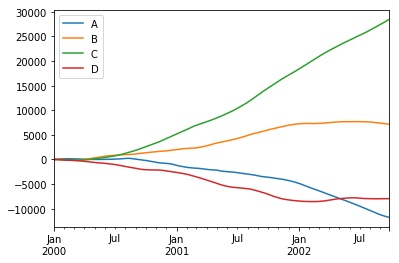

In [146]:
df.plot()

No handles with labels found to put in legend.


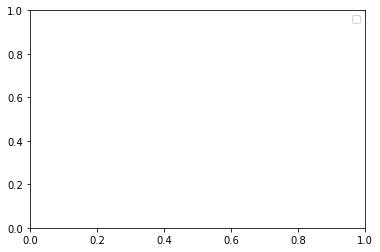

In [147]:
plt.legend(loc='best')

### Getting Data In/Out

In [148]:
df.to_csv('D:/Datasets/foo.csv')

In [150]:
pd.read_csv('D:/Datasets/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.501088,-1.671482,-1.774657,-0.042443
1,2000-01-02,1.167435,-3.706068,-5.013438,-0.904162
2,2000-01-03,3.001265,-5.698101,-9.226912,-2.614661
3,2000-01-04,4.401111,-7.685935,-13.692832,-4.383390
4,2000-01-05,5.978289,-9.169565,-17.763368,-6.697106
5,2000-01-06,8.195231,-10.619512,-20.099607,-9.518699
6,2000-01-07,11.245729,-11.219427,-21.534961,-12.083688
7,2000-01-08,14.964670,-12.337038,-22.293833,-15.873614
8,2000-01-09,19.108282,-14.140448,-20.524680,-19.279598
9,2000-01-10,23.809042,-16.004274,-19.256307,-22.408705


#### HDF5

In [151]:
df.to_hdf('D:/Datasets/foo.h5', 'df')

In [152]:
pd.read_hdf('D:/Datasets/foo.h5', 'df')

,A,B,C,D
2000-01-01,0.501088,-1.671482,-1.774657,-0.042443
2000-01-02,1.167435,-3.706068,-5.013438,-0.904162
2000-01-03,3.001265,-5.698101,-9.226912,-2.614661
2000-01-04,4.401111,-7.685935,-13.692832,-4.383390
2000-01-05,5.978289,-9.169565,-17.763368,-6.697106
2000-01-06,8.195231,-10.619512,-20.099607,-9.518699
2000-01-07,11.245729,-11.219427,-21.534961,-12.083688
2000-01-08,14.964670,-12.337038,-22.293833,-15.873614
2000-01-09,19.108282,-14.140448,-20.524680,-19.279598
2000-01-10,23.809042,-16.004274,-19.256307,-22.408705


#### Excel

In [153]:
df.to_excel('D:/Datasets/foo.xlsx', sheet_name='Sheet1')

In [154]:
pd.read_excel('D:/Datasets/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.501088,-1.671482,-1.774657,-0.042443
1,2000-01-02,1.167435,-3.706068,-5.013438,-0.904162
2,2000-01-03,3.001265,-5.698101,-9.226912,-2.614661
3,2000-01-04,4.401111,-7.685935,-13.692832,-4.383390
4,2000-01-05,5.978289,-9.169565,-17.763368,-6.697106
5,2000-01-06,8.195231,-10.619512,-20.099607,-9.518699
6,2000-01-07,11.245729,-11.219427,-21.534961,-12.083688
7,2000-01-08,14.964670,-12.337038,-22.293833,-15.873614
8,2000-01-09,19.108282,-14.140448,-20.524680,-19.279598
9,2000-01-10,23.809042,-16.004274,-19.256307,-22.408705


### Gotchas

In [155]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().